<a href="https://colab.research.google.com/github/SubhRautray06/code_2/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, \
    Dropout

image_directory = "/content/drive/MyDrive/facemask_dataset/"
newimages = []
datapath = []


In [ ]:
for folder in os.listdir(image_directory):
    for d in os.listdir(image_directory + folder):
        # print(image_directory+folder+'/'+d)
        # image_path = os.path.join(image_directory+folder, d)
        image_path = image_directory + folder + '/' + d
        datapath.append([folder, image_path])

df = pd.DataFrame(datapath, columns=["label", "path"])

class_names = df.label.unique()
number_images = df.loc[:, "label"].value_counts

In [ ]:
##Getting the train, test, validation set
split_data = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
for tr_index, val_index in split_data.split(df, df.loc[:, 'label']):
    train_df = df.loc[tr_index]
    valid_df_set = df.loc[val_index]
split_data_valid = StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=1)
for valid_index, test_index in split_data_valid.split(valid_df_set, valid_df_set.loc[:, 'label']):
    val_df = df.loc[valid_index]
    test_df = df.loc[test_index]


print('Train data : ',train_df)
print('Validation data : ',val_df)
print('Test data : ',test_df)

Train data :               label                                               path
6071  without_mask  /content/drive/MyDrive/facemask_dataset/withou...
3952  without_mask  /content/drive/MyDrive/facemask_dataset/withou...
4610  without_mask  /content/drive/MyDrive/facemask_dataset/withou...
4877  without_mask  /content/drive/MyDrive/facemask_dataset/withou...
5252  without_mask  /content/drive/MyDrive/facemask_dataset/withou...
...            ...                                                ...
167      with_mask  /content/drive/MyDrive/facemask_dataset/with_m...
1491     with_mask  /content/drive/MyDrive/facemask_dataset/with_m...
4562  without_mask  /content/drive/MyDrive/facemask_dataset/withou...
6147  without_mask  /content/drive/MyDrive/facemask_dataset/withou...
1604     with_mask  /content/drive/MyDrive/facemask_dataset/with_m...

[5287 rows x 2 columns]
Validation data :            label                                               path
2221  with_mask  /content/drive/MyD

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_dataframe(train_df, batch_size=10,y_col='label',
                                                   x_col='path', target_size=(150, 150))
validation_generator = validation_datagen.flow_from_dataframe(val_df, batch_size=10, y_col='label',
                                                   x_col='path',target_size=(150, 150))





model = Sequential([Conv2D(100,(3,3), activation='relu', input_shape = (150,150,3)),
                    MaxPooling2D(2,2),
                    Conv2D(100,(3,3), activation= 'relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dropout(0.5),
                    Dense(50, activation = 'relu'),
                    Dense(2,activation='softmax')
                    ])
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
history =  model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)



Found 5287 validated image filenames belonging to 2 classes.
Found 2039 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
154/529 [=======>......................] - ETA: 17:29 - loss: 0.5715 - acc: 0.7118

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


529/529 [==============================] - 1680s 3s/step - loss: 0.4921 - acc: 0.7734 - val_loss: 1.4825 - val_acc: 0.9093
Epoch 2/10
529/529 [==============================] - 656s 1s/step - loss: 0.4254 - acc: 0.8124 - val_loss: 1.5577 - val_acc: 0.9608
Epoch 3/10
529/529 [==============================] - 656s 1s/step - loss: 0.3994 - acc: 0.8241 - val_loss: 0.9726 - val_acc: 0.8955
Epoch 4/10
529/529 [==============================] - 682s 1s/step - loss: 0.3713 - acc: 0.8436 - val_loss: 1.4386 - val_acc: 0.9117
Epoch 5/10
529/529 [==============================] - 671s 1s/step - loss: 0.3557 - acc: 0.8527 - val_loss: 1.7109 - val_acc: 0.9431
Epoch 6/10
529/529 [==============================] - 658s 1s/step - loss: 0.3419 - acc: 0.8540 - val_loss: 1.7885 - val_acc: 0.8995
Epoch 7/10
529/529 [==============================] - 652s 1s/step - loss: 0.3388 - acc: 0.8547 - val_loss: 1.7665 - val_acc: 0.9367
Epoch 8/10
529/529 [==============================] - 655s 1s/step - loss: 0.32

In [ ]:
from tensorflow import keras
#model = keras.models.load_model('/content/drive/MyDrive/model_facemask.h5')
model.save('/content/drive/MyDrive/model_facemask.h5')

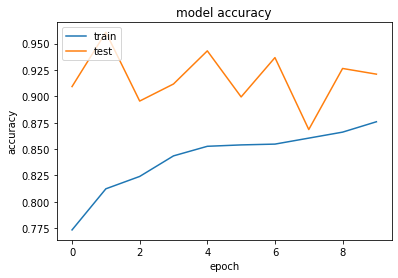

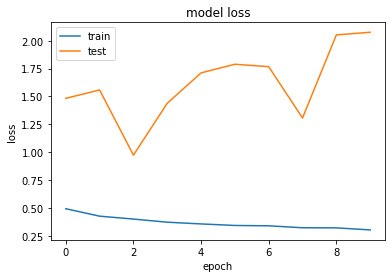

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()